In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split # split data into train and test sets
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential # ANN architecture
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten # ANN layers
from tensorflow.keras.activations import relu, sigmoid # activation functions
from tensorflow.keras.optimizers import SGD, Adam # optimizers
from tensorflow.keras.losses import binary_crossentropy # loss function

In [2]:
df=pd.read_csv('dataset.csv')
df.tail()

,Unnamed: 0,mse,mse_lab,mse_magnitude,mse_phase,med_magnitude,med_phase,hvs1,hvs2,hvs3,ssim,ncc,if_value,histogram,class
12609,5118,272.0,3.160146,272.899750,3.716570,253.0,0.000000e+00,0.039292,0.135823,113.483824,0.955859,0.000311,136.927794,13.670006,Tampered
12610,5119,146.0,1.868469,146.076800,3.738477,254.0,3.988071e-04,0.039192,0.047764,124.019408,0.973298,0.000232,73.525050,13.944947,Tampered
12611,5120,18.0,1.052999,18.178000,2.130556,255.0,2.856436e-02,0.013885,0.084138,89.379875,0.992990,0.000310,9.585495,11.527247,Tampered
12612,5121,3.0,0.582408,3.228241,1.691034,255.0,7.105427e-15,0.017413,0.010012,124.402487,0.997959,0.000495,2.113100,12.071681,Tampered
12613,5122,203.0,0.607705,203.099950,4.224677,0.0,0.000000e+00,0.065381,0.201001,112.889401,0.945832,0.000205,102.022887,10.487417,Tampered


In [3]:
df['class'].replace('Original',0,inplace=True)
df['class'].replace('Tampered',1,inplace=True)
df.tail() 

,Unnamed: 0,mse,mse_lab,mse_magnitude,mse_phase,med_magnitude,med_phase,hvs1,hvs2,hvs3,ssim,ncc,if_value,histogram,class
12609,5118,272.0,3.160146,272.899750,3.716570,253.0,0.000000e+00,0.039292,0.135823,113.483824,0.955859,0.000311,136.927794,13.670006,1
12610,5119,146.0,1.868469,146.076800,3.738477,254.0,3.988071e-04,0.039192,0.047764,124.019408,0.973298,0.000232,73.525050,13.944947,1
12611,5120,18.0,1.052999,18.178000,2.130556,255.0,2.856436e-02,0.013885,0.084138,89.379875,0.992990,0.000310,9.585495,11.527247,1
12612,5121,3.0,0.582408,3.228241,1.691034,255.0,7.105427e-15,0.017413,0.010012,124.402487,0.997959,0.000495,2.113100,12.071681,1
12613,5122,203.0,0.607705,203.099950,4.224677,0.0,0.000000e+00,0.065381,0.201001,112.889401,0.945832,0.000205,102.022887,10.487417,1


In [4]:
df=df.drop('Unnamed: 0',axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12614 entries, 0 to 12613
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   mse            12614 non-null  float64
 1   mse_lab        12614 non-null  float64
 2   mse_magnitude  12614 non-null  float64
 3   mse_phase      12614 non-null  float64
 4   med_magnitude  12614 non-null  float64
 5   med_phase      12614 non-null  float64
 6   hvs1           12606 non-null  float64
 7   hvs2           12614 non-null  float64
 8   hvs3           12614 non-null  float64
 9   ssim           12614 non-null  float64
 10  ncc            12614 non-null  float64
 11  if_value       12614 non-null  float64
 12  histogram      12614 non-null  float64
 13  class          12614 non-null  int64  
dtypes: float64(13), int64(1)
memory usage: 1.3 MB


In [5]:
df.replace([np.inf, -np.inf], np.nan, inplace=True) # Replace inf values with NaN
df.dropna(inplace=True) # Drop rows with NaN values
# X,Y are the features and target variables respectively
X = df.drop('class',axis=1) # Drop the target variable which is a class ie Original/Tampered
y = df['class'] # Keep the target variable in a separate variable y
X= np.log1p(X) # Handle extremely large values by taking the log of the values

In [6]:
X.shape # Check the shape of the features

(12604, 13)

# Creating ANN Neural Network

In [7]:
# Create the ANN Neural Network
model = Sequential()
model.add(Dense(units=64, activation='relu', input_shape=(13,))) # input layer
model.add(Dense(units=32, activation='relu'))  # hidden layer
model.add(Dense(units=1, activation='sigmoid'))  # output layer
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']) # Compile the model
model.summary() # Print the model summary



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                896       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3,009
Trainable params: 3,009
Non-trainable params: 0
_________________________________________________________________


In [8]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Split the data into train and test sets
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape) # Check the shape of the train and test sets

(10083, 13) (2521, 13) (10083,) (2521,)


In [9]:
model.fit(x_train, y_train, epochs=100, batch_size=32,validation_split=0.2,shuffle=True,verbose=1) # Fit the model on the train set

Epoch 1/100
253/253 [==============================] - 7s 11ms/step - loss: 0.6786 - accuracy: 0.5891 - val_loss: 0.6721 - val_accuracy: 0.5999
Epoch 2/100
253/253 [==============================] - 3s 12ms/step - loss: 0.6693 - accuracy: 0.5957 - val_loss: 0.6699 - val_accuracy: 0.5900
Epoch 3/100
253/253 [==============================] - 4s 18ms/step - loss: 0.6631 - accuracy: 0.5988 - val_loss: 0.6567 - val_accuracy: 0.6049
Epoch 4/100
253/253 [==============================] - 3s 12ms/step - loss: 0.6516 - accuracy: 0.6084 - val_loss: 0.6425 - val_accuracy: 0.6187
Epoch 5/100
253/253 [==============================] - 2s 6ms/step - loss: 0.6388 - accuracy: 0.6284 - val_loss: 0.6370 - val_accuracy: 0.6277
Epoch 6/100
253/253 [==============================] - 2s 6ms/step - loss: 0.6308 - accuracy: 0.6325 - val_loss: 0.6385 - val_accuracy: 0.6138
Epoch 7/100
253/253 [==============================] - 2s 7ms/step - loss: 0.6243 - accuracy: 0.6359 - val_loss: 0.6351 - val_accuracy: 0.

In [10]:
model.evaluate(x_test, y_test) # Evaluate the model on the test set

79/79 [==============================] - 0s 4ms/step - loss: 0.5030 - accuracy: 0.7493


[0.5029547810554504, 0.7493058443069458]

79/79 [==============================] - 1s 3ms/step


Text(50.722222222222214, 0.5, 'Truth')

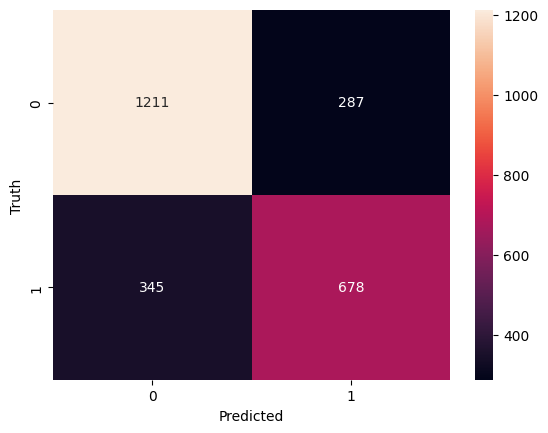

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
ypred = model.predict(x_test) # Predict on the test set
ypred=ypred>0.5
cm = tf.math.confusion_matrix(labels=y_test, predictions=ypred) # Create a confusion matrix
sns.heatmap(cm, annot=True, fmt='d') # Plot the confusion matrix
plt.xlabel('Predicted')
plt.ylabel('Truth')


In [12]:
print(classification_report(y_test, ypred)) # Print the classification report

              precision    recall  f1-score   support

           0       0.78      0.81      0.79      1498
           1       0.70      0.66      0.68      1023

    accuracy                           0.75      2521
   macro avg       0.74      0.74      0.74      2521
weighted avg       0.75      0.75      0.75      2521



# Testing

In [13]:
def preprocess(input_values):
    input_values = input_values[1:]
    input_values = input_values.reshape(1, 13)
    input_values = np.log1p(input_values)
    return input_values

def predict(input_values):
    input_values = preprocess(input_values)
    predicted_class = model.predict(input_values)
    predicted_class_label = (predicted_class > 0.5).astype(int)
    return predicted_class_label[0][0]


ORIGINAL IMAGES TEST

In [14]:
print(predict(np.array([4,2.0,0.8240057548868313,2.9664955,0.7799896569515071,0.0,0.0,0.007766019997521102,0.041094354777394385,
                         124.25885484434258,0.9988637884684111,0.0003284650565900022,1.9826796276446994,13.69397433992708])))

print(predict(np.array([3,0.0,0.12355278862847222,0.21174723,0.794285697898781,0.0,0.0,0.003242956105418036,0.02529559787990038,
                            124.74137108098446,0.9997222873305929,0.00021156162951863116,0.6057347602017548,9.366665678244317])))

print(predict(np.array([2,13.0,0.40969780815972223,13.3263645,2.1003133537489274,0.0,0.0,0.01605091790007938,0.002244155750626534,
                            134.13091820278453,0.9964026139987351,0.00012864835342581604,7.161383544412562,8.146674663672457])))

print(predict(np.array([1,0.0,0.4768812391493056,0.47688124,0.2029589611322936,0.0,0.0,0.0076054001592451665,
                            0.015541669419809606,120.96358049513205,0.9994608029123961,0.00028900960949369565,0.7381710210308509,
                            13.204835045049549])))

print(predict(np.array([0,0.0, 0.7894978841145833, 0.9651923, 0.28709132642652957, 255.0,
                            1.1351006245246926e-16, 0.007155012141966531, 0.012494405041388438,
                            130.49033500987207, 0.9995915143002699, 0.0003406328222350662,  
                            0.9823919214296488, 13.383065745350905])))

1/1 [==============================] - 0s 233ms/step
1
1/1 [==============================] - 0s 65ms/step
1
1/1 [==============================] - 0s 57ms/step
1
1/1 [==============================] - 0s 67ms/step
1
1/1 [==============================] - 0s 74ms/step
1


ORIGINAL_IMAGE_TEST-1


In [15]:
df1=pd.read_csv("dataset_original_1.csv")

In [16]:
data1=df1.to_numpy()
data1=data1[1:]

original_class=[]

for row in data1:
    row=np.array(row)
    predicted_class = predict(row)
    original_class.append(predicted_class)

print(original_class)

1/1 [==============================] - 0s 33ms/step
[1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1]


In [17]:
print(original_class.count(1))
print(original_class.count(0))

206
107


TAMPERED_IMAGE_TEST-1


In [18]:
df2=pd.read_csv("dataset_tampered_1.csv")

In [19]:
data2=df2.to_numpy()
data2=data2[1:]

tampered_class=[]

for row in data2:
    row=np.array(row)
    predicted_class = predict(row)
    tampered_class.append(predicted_class)


print(tampered_class)

1/1 [==============================] - 0s 43ms/step
[0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0]


In [20]:
print(tampered_class.count(1))
print(tampered_class.count(0))

199
114
